## Sentiment Analysis of Social Media Content in Pashto text

In the present era, people express their opinions on social media in the English language as well as their native languages. So we performed a Sentiment Analysis of the native language 'Pashto'. The Pashto language is the national language of Afghanistan, and it is spoken in many regions of Pakistan. We used online social networks generated corpus translated into English and annotated it into positive, and negative, by two different native and well-aware Pashto speakers.
Here we performed Sentiment Analysis (SA) on Pashto Text using Machine Learning Models including Support Vector Machine (SVM), Naive Bayes (NB), Decision Tree (DT), Random Forest (RF) and AdaBoost with n-gram model of feature extraction technique.

In [2]:
# importing the necessary libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the corpus from my local storage 
pashtoText= pd.read_csv('PashtoCorpusUpdated.csv')
pashtoText.head(3)

,Id,Source,Topic,PashtoText,EnglishtTranslation,AnnotatorOne,AnnotatorTwo
0,1,https://www.facebook.com/167959249906191/posts...,افغان ولسمشر محمد اشرف غني ویلي، په اوسنیو شرا...,د لیوني څخه پوښتنه د یو لیونی څخه یو چا پوښتنه...,Question from a madman Someone asked that grie...,Negative,Negative
1,2,NaN,Afghan President Mohammad Ashraf Ghani said th...,جهالت د نابالغه ماشومانو په باچا پورې خندل نه...,"Ignorance of immature children ,If you don't l...",Positive,Positive
2,3,NaN,NaN,ماته خو بی خوبه خکاری نور نه پو هیږم,I like it but I don't know anymore,Positive,Positive


In [4]:
pashtoText.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   600 non-null    int64 
 1   Source               12 non-null     object
 2   Topic                19 non-null     object
 3   PashtoText           600 non-null    object
 4   EnglishtTranslation  600 non-null    object
 5   AnnotatorOne         600 non-null    object
 6   AnnotatorTwo         600 non-null    object
dtypes: int64(1), object(6)
memory usage: 32.9+ KB


In [5]:
# dropping unnecessary columns
pashtoText.drop(["Id","Source", "Topic", "PashtoText", "AnnotatorTwo"], axis=1, inplace=True)

In [6]:
pashtoText['EnglishtTranslation'] = pashtoText['EnglishtTranslation'].astype('string')
pashtoText['AnnotatorOne'] = pashtoText['AnnotatorOne'].astype('string')

In [7]:
# covert string into numerical of reviewe attr
labels = {"Positive": 1, "Negative": 0}
pashtoText['AnnotatorOne'] = pashtoText['AnnotatorOne'].map(labels)
pashtoText.head()

,EnglishtTranslation,AnnotatorOne
0,Question from a madman Someone asked that grie...,0
1,"Ignorance of immature children ,If you don't l...",1
2,I like it but I don't know anymore,1
3,Ghani is a leader for himself and not for the ...,0
4,what happened with you. This is not joking tha...,0


In [8]:
pashtoText['AnnotatorOne'].value_counts(normalize=True)*100

1    59.5
0    40.5
Name: AnnotatorOne, dtype: float64

In [9]:
from nltk.corpus import stopwords # to remove the stopwrods
from nltk.stem.porter import PorterStemmer # steam to root word every
import re
steamer = PorterStemmer()

In [10]:
from tqdm import tqdm # to show the process bar
cleanedText = []
for i in tqdm(range(0,len(pashtoText))):
    temp = re.sub('[^a-zA-Z]', ' ',pashtoText['EnglishtTranslation'][i]) 
    temp = temp.lower() 
    temp = temp.split() 
    temp = [steamer.stem(word) for word in temp if not word in stopwords.words('english')] 
    temp = ' '.join(temp) 
    cleanedText.append(temp)

100%|██████████| 600/600 [00:03<00:00, 191.65it/s]


In [11]:
cleanedText[:5]

['question madman someon ask grief good happi import thing pot food said madman',
 'ignor immatur children laugh king ghani pride ghani leader ghani mourner countri',
 'like know anymor',
 'ghani leader peopl countri go citizen sell bodi',
 'happen joke']

In [12]:
x = pd.DataFrame(cleanedText)

In [13]:
x = cleanedText
print(type(x))

<class 'list'>


In [14]:
y = pashtoText['AnnotatorOne']

In [15]:
from sklearn.model_selection import train_test_split # to split the data
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size= 0.2, random_state = 40)

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
# Feature Engineering - TF-IDF Vectorization
nGramVectorizer = CountVectorizer(ngram_range=(1, 1),max_features=1000)
xTrainNGram = nGramVectorizer.fit_transform(xTrain)
xTestNGram = nGramVectorizer.transform(xTest)

In [69]:
# Access the vocabulary (list of unique words)
vocabulary = nGramVectorizer.get_feature_names_out()

In [70]:
# Display the BoW matrix as a dense array
print(xTrainNGram.toarray())
# print("Vocabulary:", vocabulary)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [71]:
print(xTrainNGram.shape)

(480, 949)


### SVM model

In [72]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

In [73]:
# Train the SVM model
svmModel = SVC(kernel='linear', probability=True)
svmModel.fit(xTrainNGram, yTrain) 

SVC(kernel='linear', probability=True)

In [74]:
svmPrediction = svmModel.predict(xTestNGram)

In [75]:
print(f"Accuracy of SVM Model:{ accuracy_score(yTest, svmPrediction):.2f}")
print(classification_report(yTest, svmPrediction))


Accuracy of SVM Model:0.78
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        54
           1       0.76      0.86      0.81        66

    accuracy                           0.78       120
   macro avg       0.78      0.77      0.77       120
weighted avg       0.78      0.78      0.77       120



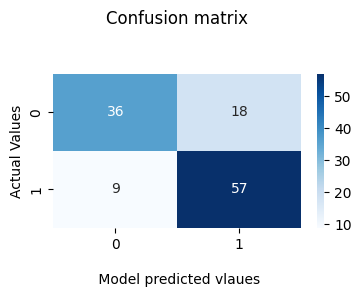

In [76]:
# ploting the confusion matrix
plt.figure(figsize=(4, 2))
confusionMatrix = pd.crosstab(yTest, svmPrediction)
conf = sns.heatmap(confusionMatrix, annot=True, cmap='Blues', fmt='d')
conf.set_title('Confusion matrix\n\n');
conf.set_xlabel('\n Model predicted vlaues')
conf.set_ylabel('Actual Values')
plt.show()

### Naive Bayes Classifier

In [77]:
from sklearn.naive_bayes import MultinomialNB

In [78]:
# Create and train the Multinomial Naive Bayes classifier
nbModel = MultinomialNB()
nbModel = nbModel.fit(xTrainNGram, yTrain)

In [79]:
nbPrediction = nbModel.predict(xTestNGram)

In [28]:
print(f"Accuracy of NB Model:{ accuracy_score(yTest, nbPrediction):.2f}")
print(classification_report(yTest, nbPrediction))

Accuracy of NB Model:0.79
              precision    recall  f1-score   support

           0       0.85      0.65      0.74        54
           1       0.76      0.91      0.83        66

    accuracy                           0.79       120
   macro avg       0.81      0.78      0.78       120
weighted avg       0.80      0.79      0.79       120



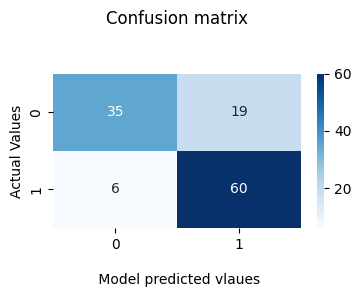

In [29]:
# ploting the confusion matrix
plt.figure(figsize=(4, 2))
confusionMatrix = pd.crosstab(yTest, nbPrediction)
conf = sns.heatmap(confusionMatrix, annot=True, cmap='Blues', fmt='d')
conf.set_title('Confusion matrix\n\n');
conf.set_xlabel('\n Model predicted vlaues')
conf.set_ylabel('Actual Values')
plt.show()

### Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtModel = DecisionTreeClassifier(criterion = 'gini')
dtModel = dtModel.fit(xTrainNGram, yTrain)

In [32]:
dtPrediction = dtModel.predict(xTestNGram)

In [33]:
print(f"Accuracy score of DT model: { accuracy_score(yTest, dtPrediction): .2f}")
print(classification_report(yTest, dtPrediction))

Accuracy score of DT model:  0.72
              precision    recall  f1-score   support

           0       0.78      0.52      0.62        54
           1       0.69      0.88      0.77        66

    accuracy                           0.72       120
   macro avg       0.73      0.70      0.70       120
weighted avg       0.73      0.72      0.71       120



### Random Forest Classifier 

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfModel = RandomForestClassifier(random_state=50)
rfModel = rfModel.fit(xTrainNGram, yTrain)

In [35]:
rfPrediction = rfModel.predict(xTestNGram)

In [36]:
print(f"Accuracy score of RF model: { accuracy_score(yTest, rfPrediction): .2f}")
print(classification_report(yTest, rfPrediction))

Accuracy score of RF model:  0.75
              precision    recall  f1-score   support

           0       0.90      0.50      0.64        54
           1       0.70      0.95      0.81        66

    accuracy                           0.75       120
   macro avg       0.80      0.73      0.73       120
weighted avg       0.79      0.75      0.73       120



### AdaBoost Classifier


In [37]:
from sklearn.ensemble import AdaBoostClassifier
adaBoostModel = AdaBoostClassifier(n_estimators=50, random_state=10)
adaBoostModel = adaBoostModel.fit(xTrainNGram, yTrain)

In [38]:
adBoostPrediction = adaBoostModel.predict(xTestNGram)

In [39]:
print(f"Accuracy score of RF model: { accuracy_score(yTest, adBoostPrediction): .2f}")
print(classification_report(yTest, adBoostPrediction))

Accuracy score of RF model:  0.69
              precision    recall  f1-score   support

           0       0.90      0.35      0.51        54
           1       0.65      0.97      0.78        66

    accuracy                           0.69       120
   macro avg       0.78      0.66      0.64       120
weighted avg       0.76      0.69      0.65       120



In [40]:
# Probabilities prediction
probs = [0 for _ in range(len(yTest))]
svmProb = svmModel.predict_proba(xTestNGram)
nbProb = nbModel.predict_proba(xTestNGram)
dtProb = dtModel.predict_proba(xTestNGram)
rfProb = rfModel.predict_proba(xTestNGram)
adaBoostProb = adaBoostModel.predict_proba(xTestNGram)

Probablities of positive outcome

In [41]:
svmProb = svmProb[:, 1]
nbProb = nbProb[:, 1]
dtProb = dtProb[:, 1]
rfProb = rfProb[:, 1]
adaBoostProb = adaBoostProb[:, 1]

AUROC values

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
aurRand = roc_auc_score(yTest, probs)
svmAUC = roc_auc_score(yTest, svmProb)
nbAUC = roc_auc_score(yTest, nbProb)
dtAUC = roc_auc_score(yTest, dtProb)
rfAUC = roc_auc_score(yTest, rfProb)
adaBoostAUC = roc_auc_score(yTest, adaBoostProb)

Display AUCROC Score

In [43]:
print("Random prediction AUROC ____ = %.3f" %(aurRand))
print("SVM score of AUROC ________  = %.3f" %(svmAUC))
print("Naive Bayes score of AUROC _ = %.3f" %(nbAUC))
print("Decion Tree score of AUROC _ = %.3f" %(dtAUC))
print("Random Forest score of AUROC = %.3f" %(rfAUC))
print("AdaBoost Score of AUROC ____ = %.3f" %(adaBoostAUC))

Random prediction AUROC ____ = 0.500
SVM score of AUROC ________  = 0.846
Naive Bayes score of AUROC _ = 0.872
Decion Tree score of AUROC _ = 0.704
Random Forest score of AUROC = 0.875
AdaBoost Score of AUROC ____ = 0.801


Compute the ROC 

In [44]:
RandFPR, randTPR, _ = roc_curve(yTest, probs)
svmFPR, svmTPR, _ = roc_curve(yTest, svmProb)
nbFPR, nbTPR, _ = roc_curve(yTest, nbProb)
dtFPR, dtTPR, _ = roc_curve(yTest, dtProb)
rfFPR, rfTPR, _ = roc_curve(yTest, rfProb)
adaBoostFPR, adaBoostTPR, _ = roc_curve(yTest, adaBoostProb)

Ploting the ROC: comparision of all models

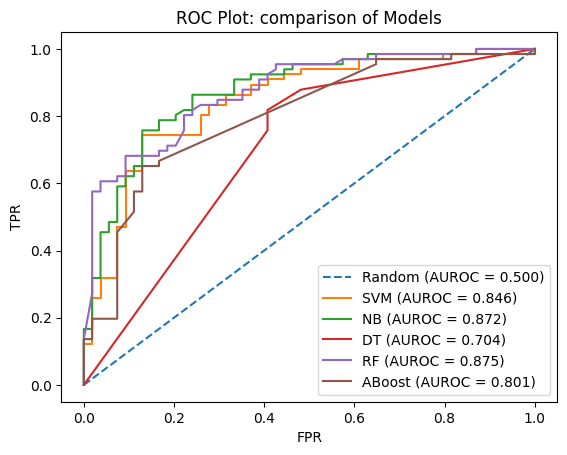

In [45]:
plt.Figure(figsize=(6, 14))
plt.plot(RandFPR, randTPR,  linestyle = '--', label= 'Random (AUROC = %.3f)' % aurRand )
plt.plot(svmFPR, svmTPR,  linestyle = 'solid', label= 'SVM (AUROC = %.3f)' % svmAUC )
plt.plot(nbFPR, nbTPR,  linestyle = 'solid', label= 'NB (AUROC = %.3f)' % nbAUC )
plt.plot(dtFPR, dtTPR,  linestyle = 'solid', label= 'DT (AUROC = %.3f)' % dtAUC )
plt.plot(rfFPR, rfTPR,  linestyle = 'solid', label= 'RF (AUROC = %.3f)' % rfAUC )
plt.plot(adaBoostFPR, adaBoostTPR,  linestyle = 'solid', label= 'ABoost (AUROC = %.3f)' % adaBoostAUC )

plt.title('ROC Plot: comparison of Models')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [83]:
sent = 'He is great man'
opinion = re.sub('[^a-zA-Z]', ' ', sent)
opinion = opinion.lower()
opinion = opinion.split()
steamer = PorterStemmer()
stopwordAll = stopwords.words('english')
stopwordAll.remove('not')
opinion = [steamer.stem(word) for word in opinion if not word in set(stopwordAll)]
opinion = ' '.join(opinion)
corpusNew = [opinion]
TestX = nGramVectorizer.transform(corpusNew)
predYNew = nbModel.predict(TestX)
if predYNew == 1:
  print(f"Positive review: {sent}")
elif predYNew == 0:
  print(f"Negative review: {sent}")

Positive review: He is great man


In [84]:
# from joblib import dump
# fileName = "nbModelPred.joblib"
# dump(nbModel, fileName)

['nbModelPred.joblib']

In [85]:
# vectorName = "vect.joblib"
# dump(nGramVectorizer, vectorName)

['vect.joblib']